<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.4_probability_theory/stats_probtheory_conditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Probability theory
# Conditional probability

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## generate two long-spike time series

N = 10000
spikeDur  = 10  # a.u. but must be an even number
spikeNumA = .01 # in proportion of total number of points
spikeNumB = .05 # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)


### populate time series A
spiketimesA = np.random.randint(0,N,int(N*spikeNumA))

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):

    # find boundaries
    bnd_pre = int( max(0,spiketimesA[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesA[spikei]+spikeDur/2) )

    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1


# ### repeat for time series 2
spiketimesB = np.random.randint(0,N,int(N*spikeNumB))
# spiketimesB[:len(spiketimesA)] = spiketimesA # induce strong conditional probability

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):

    # find boundaries
    bnd_pre = int( max(0,spiketimesB[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesB[spikei]+spikeDur/2) )

    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1


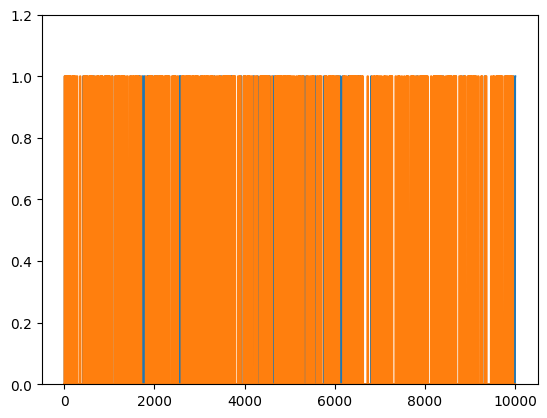

In [7]:
## let's see what they look like

plt.plot(range(N),spike_tsA, range(N),spike_tsB)
plt.ylim([0,1.2])
# plt.xlim([2000,2500])
plt.show()

In [4]:
## compute their probabilities and intersection

# probabilities
probA = sum(spike_tsA==1) / N
probB = np.mean(spike_tsB)

# joint probability
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA,probB,probAB)

0.0965 0.3942 0.0429


In [5]:
## compute the conditional probabilities

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
print('P(A)   = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B)   = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A)   = 0.0965
P(A|B) = 0.108828
P(B)   = 0.3942
P(B|A) = 0.44456


---
example 2
---

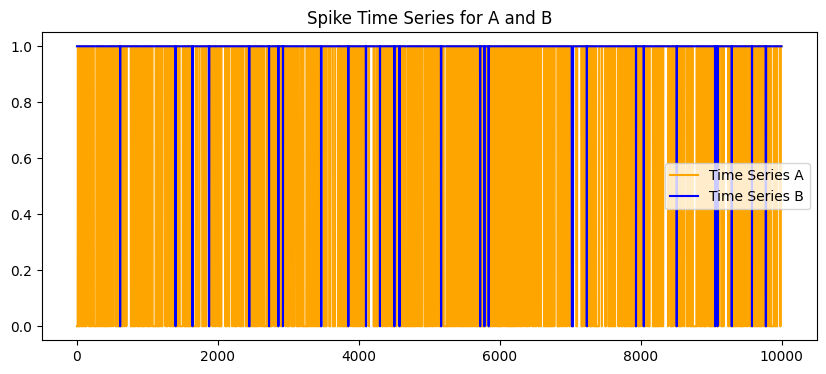

Probability of A: 0.661
Probability of B: 0.991
Joint Probability of A and B: 0.655
Conditional Probability of A given B: 0.661
Conditional Probability of B given A: 0.991


In [8]:

# Number of time points in the time series
N = 10000

# Duration of each spike/plateau
spike_duration = 10

# Proportion of points that will have spikes in time series A and B
prob_A = 0.1  # A has fewer spikes
prob_B = 0.4  # B has more spikes

# Initialize two time series with zeros
time_series_A = np.zeros(N)
time_series_B = np.zeros(N)

# Generate random spike centers for time series A
spike_centers_A = np.random.choice(range(N), size=int(N * prob_A), replace=False)

# Fill the spikes in time series A
for center in spike_centers_A:
    # Ensure the spike duration stays within the bounds of the array
    time_series_A[max(0, center - spike_duration//2):min(N, center + spike_duration//2)] = 1

# Generate random spike centers for time series B
spike_centers_B = np.random.choice(range(N), size=int(N * prob_B), replace=False)

# Fill the spikes in time series B
for center in spike_centers_B:
    # Ensure the spike duration stays within the bounds of the array
    time_series_B[max(0, center - spike_duration//2):min(N, center + spike_duration//2)] = 1

# Uncomment the line below to make B spikes overlap exactly with A spikes
# This induces strong conditional probability
# time_series_B[np.where(time_series_A == 1)] = 1

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series_A, label='Time Series A', color='orange')
plt.plot(time_series_B, label='Time Series B', color='blue')
plt.title('Spike Time Series for A and B')
plt.legend()
plt.show()

# Compute the individual probabilities of A and B
prob_A = np.mean(time_series_A)  # Probability of spike in time series A
prob_B = np.mean(time_series_B)  # Probability of spike in time series B

# Compute the joint probability P(A and B)
joint_prob_AB = np.mean((time_series_A + time_series_B) == 2)

# Compute the conditional probabilities P(A|B) and P(B|A)
cond_prob_A_given_B = joint_prob_AB / prob_B if prob_B > 0 else 0
cond_prob_B_given_A = joint_prob_AB / prob_A if prob_A > 0 else 0

# Print the probabilities
print(f"Probability of A: {prob_A:.3f}")
print(f"Probability of B: {prob_B:.3f}")
print(f"Joint Probability of A and B: {joint_prob_AB:.3f}")
print(f"Conditional Probability of A given B: {cond_prob_A_given_B:.3f}")
print(f"Conditional Probability of B given A: {cond_prob_B_given_A:.3f}")